In [11]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.spatial import distance_matrix
from sklearn.neighbors import DistanceMetric
import seaborn as sns

<AxesSubplot:>

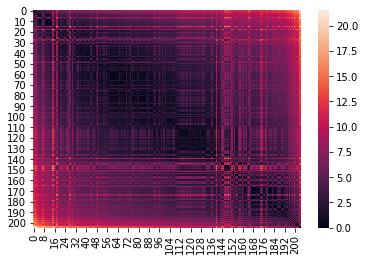

In [16]:
df_shops=pd.read_csv("../Data/stores_near_zurich_merged_duplicates_removed_plz_kreis_info_FINAL.csv",)
df_shops.head(20)

df_shops["geometry.location.lat"]=np.radians(df_shops["geometry.location.lat"])
df_shops["geometry.location.lng"]=np.radians(df_shops["geometry.location.lng"])
data=df_shops[['geometry.location.lat','geometry.location.lng']].to_numpy()

df_dist = pd.DataFrame(dist.pairwise(df_shops[['geometry.location.lat','geometry.location.lng']].to_numpy())*6373)
    
    
#    distance_matrix(np.radians(data.values), np.radians(data.values), index=data.index, columns=data.index)
df_dist 
dist = DistanceMetric.get_metric('haversine')
dist.pairwise(data)*6373
#fig, ax = plt.subplots(figsize=(15,10))   
#
sns.heatmap(df_dist)

In [7]:
'''
Calculate distance using the Haversine Formula
'''

def haversine(lat1,lng1, lat2,lng2):

    R = 6378100  # radius of Earth in meters, taken from the equator
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)

    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lng2 - lng1)

    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = np.round(meters, 3)
    km = np.round(km, 3)
    return km

In [46]:
df_shops=pd.read_csv("stores_near_zurich_merged_duplicates_removed_plz_kreis_info_FINAL.csv",)
df_shops.head(20)
df_coord=df_shops[["geometry.location.lat","geometry.location.lng"]]
lat1 = df_shops["geometry.location.lat"].values
lng1=df_shops["geometry.location.lng"].values
lat2 = df_shops["geometry.location.lat"].shift(1).values
lng2=df_shops["geometry.location.lng"].shift(1).values
result_matrix=np.zeros((len(lat1),len(lat1)))
print(result_matrix.shape)
for i in range(0,len(lat1)):
    lat2 = df_shops["geometry.location.lat"].shift(i).values
    lng2=df_shops["geometry.location.lng"].shift(i).values
    result_matrix[i,:]=haversine(lat1,lng1,lat2,lng2)
print(result_matrix)
df_shops.tail(5)
column1 = diag

(205, 205)
[[ 0.     0.     0.    ...  0.     0.     0.   ]
 [   nan  4.939  4.358 ...  0.103  1.36   9.14 ]
 [   nan    nan  1.43  ...  7.359  1.378  8.142]
 ...
 [   nan    nan    nan ... 16.086 16.495 20.127]
 [   nan    nan    nan ...    nan 16.463 19.438]
 [   nan    nan    nan ...    nan    nan 21.556]]


,Unnamed: 0,business_status,name,place_id,rating,types,user_ratings_total,geometry.location.lat,geometry.location.lng,PostalCode,...,Einwohner\nDez. 2013_PLZ,Einwohner\nDez. 2005_PLZ,Ausländer \nDez. 2018_PLZ,Stadtkreis,KreisNumber,Fläche\nin km²_Kreis,Einwohner \nDez. 2018_Kreis,Einwohner\nDez. 2013_Kreis,Einwohner\nDez. 2005_Kreis,Ausländer \nDez. 2018_Kreis
200,200,OPERATIONAL,Lidl,ChIJLShbyakMkEcR_jalCAiE1Uc,4.2,"['supermarket', 'convenience_store', 'grocery_...",305,47.444310,8.465036,8105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,201,OPERATIONAL,Migros Supermarket Zurich Airport,ChIJ_SR38lZ1kEcReSR9696npIg,4.5,"['grocery_or_supermarket', 'supermarket', 'foo...",853,47.449377,8.562699,8058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,202,OPERATIONAL,Coop Pronto Zürich Flughafen,ChIJ56y3sVd1kEcRJyQJlYVxzGQ,3.9,"['supermarket', 'grocery_or_supermarket', 'foo...",46,47.450275,8.562389,8302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,203,OPERATIONAL,Lidl,ChIJUcR7g--fmkcR-eAZgZ5IL-w,4.1,"['supermarket', 'grocery_or_supermarket', 'hom...",715,47.454714,8.579219,8302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,204,OPERATIONAL,Migros Supermarkt,ChIJOTej-29zkEcR6qL_oBEOIn4,4.3,"['grocery_or_supermarket', 'supermarket', 'foo...",560,47.480734,8.464024,8157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_shops_plz= pd.read_csv("stores_near_zurich_merged_duplicates_removed_plzinfo_V1.csv")
df_shops_plz[df_shops_plz["user_ratings_total"]>50].sort_values(by=["rating"]).head(20)
df_shops_plz.groupby(["PostalCode"])

In [2]:
#population by quarter,age,nationality (swiss/F), gender
Pop_by_quar_age_grp_gend_nat = pd.read_csv("Data/bev390od3903.csv")
Pop_by_quar_age_grp_gend_nat

,StichtagDatJahr,QuarSort,QuarCd,QuarLang,AlterVSort,AlterVKurz,AlterV05Sort,AlterV05Kurz,HerkunftLang,HerkunftSort,SexCd,SexKurz,AnzBestWir
0,1993,11,11,Rathaus,0,0,1,0-4,Schweizer/in,1,1,M,11
1,1993,11,11,Rathaus,0,0,1,0-4,Schweizer/in,1,2,W,8
2,1993,11,11,Rathaus,0,0,1,0-4,Ausländer/in,2,1,M,1
3,1993,11,11,Rathaus,0,0,1,0-4,Ausländer/in,2,2,W,6
4,1993,11,11,Rathaus,1,1,1,0-4,Schweizer/in,1,1,M,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332761,2019,123,123,Hirzenbach,97,97,20,95-99,Schweizer/in,1,2,W,3
332762,2019,123,123,Hirzenbach,98,98,20,95-99,Schweizer/in,1,1,M,1
332763,2019,123,123,Hirzenbach,98,98,20,95-99,Schweizer/in,1,2,W,2
332764,2019,123,123,Hirzenbach,101,101,21,100 u. älter,Schweizer/in,1,2,W,1


In [5]:
pd.array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '95-99', '100 u. älter'],
      dtype=object)

<PandasArray>
[         '0-4',          '5-9',        '10-14',        '15-19',
        '20-24',        '25-29',        '30-34',        '35-39',
        '40-44',        '45-49',        '50-54',        '55-59',
        '60-64',        '65-69',        '70-74',        '75-79',
        '80-84',        '85-89',        '90-94',        '95-99',
 '100 u. älter']
Length: 21, dtype: object

In [6]:
Pop_by_year_quar = Pop_by_quar_age_grp_gend_nat.groupby(['StichtagDatJahr','QuarSort','QuarLang']).apply(lambda x: pd.Series(dict(
    Swiss=x[x['HerkunftLang'] == 'Schweizer/in']['AnzBestWir'].sum(),
    Foreigners=x[x['HerkunftLang'] == 'Ausländer/in']['AnzBestWir'].sum(),
    Male=x[x['SexKurz'] == 'M']['AnzBestWir'].sum(),
    Female=x[x['SexKurz'] == 'W']['AnzBestWir'].sum(),
    Total=x['AnzBestWir'].sum()
))).reset_index()

# Visualise it
Pop_by_year_quar

,StichtagDatJahr,QuarSort,QuarLang,Swiss,Foreigners,Male,Female,Total
0,1993,11,Rathaus,2487,646,1723,1410,3133
1,1993,12,Hochschulen,614,194,455,353,808
2,1993,13,Lindenhof,951,185,544,592,1136
3,1993,14,City,579,305,501,383,884
4,1993,21,Wollishofen,12856,3071,7181,8746,15927
...,...,...,...,...,...,...,...,...
913,2019,115,Oerlikon,14362,8926,11921,11367,23288
914,2019,119,Seebach,15690,10116,13337,12469,25806
915,2019,121,Saatlen,6377,2464,4333,4508,8841
916,2019,122,Schwamendingen-Mitte,6457,4804,5635,5626,11261


In [9]:
Pop_by_year_quar_2010plus=Pop_by_year_quar[Pop_by_year_quar["StichtagDatJahr"]>2009]
Pop_by_year_quar_2010plus[Pop_by_year_quar_2010plus["QuarSort"]==11]

,StichtagDatJahr,QuarSort,QuarLang,Swiss,Foreigners,Male,Female,Total
578,2010,11,Rathaus,2205,894,1673,1426,3099
612,2011,11,Rathaus,2242,898,1697,1443,3140
646,2012,11,Rathaus,2252,912,1679,1485,3164
680,2013,11,Rathaus,2269,925,1717,1477,3194
714,2014,11,Rathaus,2276,960,1720,1516,3236
748,2015,11,Rathaus,2233,964,1708,1489,3197
782,2016,11,Rathaus,2239,987,1722,1504,3226
816,2017,11,Rathaus,2271,995,1742,1524,3266
850,2018,11,Rathaus,2284,983,1755,1512,3267
884,2019,11,Rathaus,2295,1012,1788,1519,3307


In [33]:
divide_array=Pop_by_year_quar_2010plus[Pop_by_year_quar_2010plus["QuarSort"]==11][["Swiss","Foreigners","Male","Female","Total"]]
Pop_by_year_quar_2010plus[Pop_by_year_quar_2010plus["QuarSort"]==11].loc[:, ("Swiss","Foreigners","Male","Female","Total")].divide(divide_array.iloc[0],axis=1)

,Swiss,Foreigners,Male,Female,Total
578,1.000000,1.000000,1.000000,1.000000,1.000000
612,1.016780,1.004474,1.014345,1.011921,1.013230
646,1.021315,1.020134,1.003586,1.041374,1.020975
680,1.029025,1.034676,1.026300,1.035764,1.030655
714,1.032200,1.073826,1.028093,1.063114,1.044208
748,1.012698,1.078300,1.020921,1.044180,1.031623
782,1.015420,1.104027,1.029289,1.054698,1.040981
816,1.029932,1.112975,1.041243,1.068724,1.053888
850,1.035828,1.099553,1.049014,1.060309,1.054211
884,1.040816,1.131991,1.068739,1.065217,1.067118


In [32]:
Pop_by_year_quar_2010plus[Pop_by_year_quar_2010plus["QuarSort"]==11].loc[:, ("Swiss","Foreigners","Male","Female","Total")]=Pop_by_year_quar_2010plus[Pop_by_year_quar_2010plus["QuarSort"]==11].loc[:, ("Swiss","Foreigners","Male","Female","Total")].divide(divide_array.iloc[0],axis=1)
Pop_by_year_quar_2010plus[Pop_by_year_quar_2010plus["QuarSort"]==11]

/opt/anaconda3/envs/propulsion/lib/python3.8/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,StichtagDatJahr,QuarSort,QuarLang,Swiss,Foreigners,Male,Female,Total
578,2010,11,Rathaus,2205,894,1673,1426,3099
612,2011,11,Rathaus,2242,898,1697,1443,3140
646,2012,11,Rathaus,2252,912,1679,1485,3164
680,2013,11,Rathaus,2269,925,1717,1477,3194
714,2014,11,Rathaus,2276,960,1720,1516,3236
748,2015,11,Rathaus,2233,964,1708,1489,3197
782,2016,11,Rathaus,2239,987,1722,1504,3226
816,2017,11,Rathaus,2271,995,1742,1524,3266
850,2018,11,Rathaus,2284,983,1755,1512,3267
884,2019,11,Rathaus,2295,1012,1788,1519,3307


In [ ]:
df_shops_plz= pd.read_csv("stores_near_zurich_merged_duplicates_removed_plz_kreis_info_FINAL.csv")